In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape[0])
print(x_train.shape[1])
print(x_train.shape[2])

x_train=x_train.reshape((x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
print(x_train.shape[0])
print(x_train.shape[1])

60000
28
28
60000
784


In [7]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

x_train,_,y_train,_=train_test_split(x_train,y_train,test_size=0.67,random_state=7)

In [8]:
model=Sequential()

model.add(Dense(50,input_shape=(784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [11]:
sgd=SGD(lr =0.001)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(x_train,y_train,validation_split =0.3,epochs=100,verbose=1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


434/434 [==============================] - 2s 3ms/step - loss: 2.4255 - accuracy: 0.1030 - val_loss: 2.3773 - val_accuracy: 0.1000
Epoch 2/100
434/434 [==============================] - 1s 3ms/step - loss: 2.3432 - accuracy: 0.1030 - val_loss: 2.3283 - val_accuracy: 0.1000
Epoch 3/100
434/434 [==============================] - 1s 3ms/step - loss: 2.3147 - accuracy: 0.1039 - val_loss: 2.3110 - val_accuracy: 0.1005
Epoch 4/100
434/434 [==============================] - 1s 2ms/step - loss: 2.3050 - accuracy: 0.1049 - val_loss: 2.3050 - val_accuracy: 0.1024
Epoch 5/100
434/434 [==============================] - 1s 3ms/step - loss: 2.3018 - accuracy: 0.1119 - val_loss: 2.3028 - val_accuracy: 0.1106
Epoch 6/100
434/434 [==============================] - 1s 2ms/step - loss: 2.3006 - accuracy: 0.1144 - val_loss: 2.3018 - val_accuracy: 0.1118
Epoch 7/100
434/434 [==============================] - 1s 3ms/step - loss: 2.3001 - accuracy: 0.1143 - val_loss: 2.3014 - val_accuracy: 0.1118
Epoch 8/100

In [12]:
results=model.evaluate(x_test, y_test)
print('Test accuracy:',results[1])

313/313 [==============================] - 0s 2ms/step - loss: 2.2710 - accuracy: 0.1143
Test accuracy: 0.11429999768733978


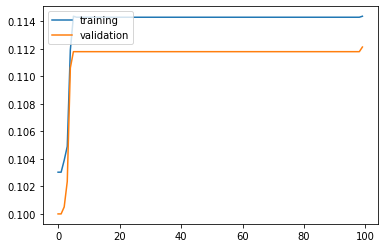

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'],loc='upper left')
plt.show()